In [1]:
%matplotlib inline

import setGPU

import os, h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm, Normalize

import glob

setGPU: Setting GPU to: 0


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from plots import plotHistogram, loadModel, plotSumHist

In [12]:
gen_model1 = '/nfshome/vitoriabp/hgcal_wgan/trial23/weights/generator_model_bs_128_lr_0.00005_latent_100_ncritic_5_clip_0.01_shuffle.json'
g_weight1 = '/nfshome/vitoriabp/hgcal_wgan/trial23/weights/generator_weights_epoch_2925_bs_128_lr_0.00005_latent_100_ncritic_5_clip_0.01_shuffle.h5'

g = loadModel(gen_model1)
g.load_weights(g_weight1)
generated_images = g.predict(noise)

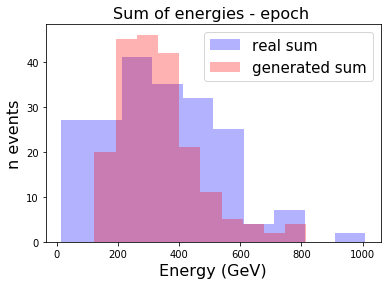

In [23]:
x = plotHistogram(inp_sum, gen_sum, bins=10)

In [21]:
na = x[0][0]
bina = x[0][1]

array([27., 27., 41., 35., 32., 25.,  4.,  7.,  0.,  2.])

In [26]:
nb = x[1][0]
binb = x[1][1]

In [110]:
energies = np.linspace(start=min(min(bina), min(binb)), stop=max(max(bina), max(binb)), num=10)

In [45]:
ratios = np.log(np.max([nb, np.ones(len(nb))*1E-4], axis=0) / np.max([na, np.ones(len(na))*1E-4], axis=0))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


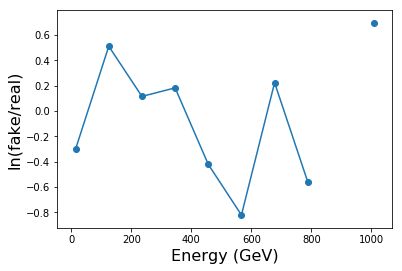

In [120]:
plt.plot(energies, ratios)
plt.scatter(energies, ratios)
plt.xlabel("Energy (GeV)", size=16)
plt.ylabel("ln(fake/real)", size=16)

In [3]:
n_samples = 200

f = h5py.File('/bigdata/shared/HGCAL_data/single_particle/all_noPU.h5', 'r')
X = np.asarray(f['image'])
#X = X.squeeze()
inp_sum = np.sum(X[0:n_samples], axis = (1, 2, 3))

In [4]:
all_g_weight1 = '/nfshome/vitoriabp/hgcal_wgan/trial23/weights/generator_weights_epoch_*.h5'
gen_model1 = '/nfshome/vitoriabp/hgcal_wgan/trial23/weights/generator_model_bs_128_lr_0.00005_latent_100_ncritic_5_clip_0.01_shuffle.json'

In [4]:
all_g_weight2 = '../trial28/weights/generator_weights_epoch_*.h5'
gen_model2 = '../trial28/weights/generator_model_bs_128_lr_0.00005_latent_100_ncritic_5_clip_0.01.json'

In [6]:
#all_g_weight2 = '/nfshome/vitoriabp/hgcal_wgan/trial26/weights/generator_weights_epoch_*.h5'
#gen_model2 = '/nfshome/vitoriabp/hgcal_wgan/trial26/weights/generator_model_change_discriminator.json'

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


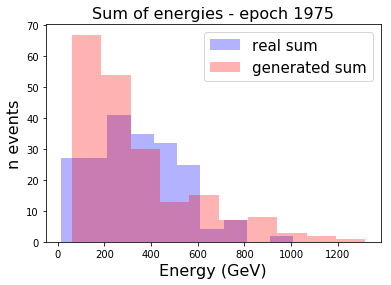

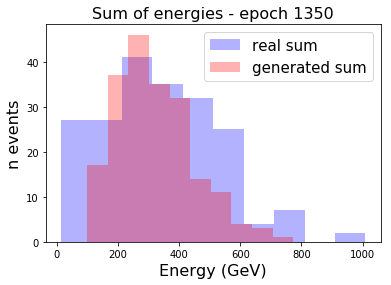

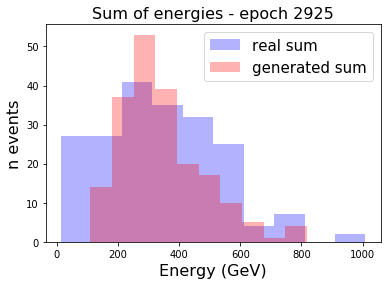

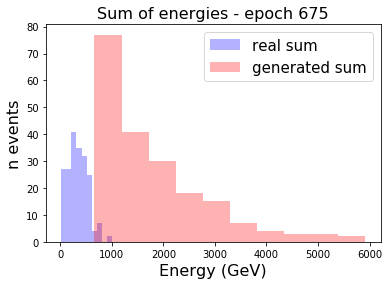

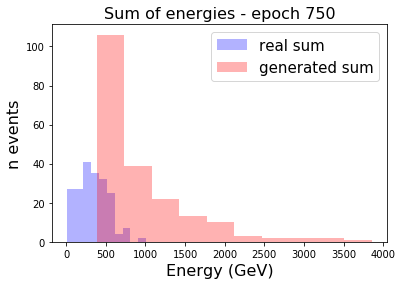

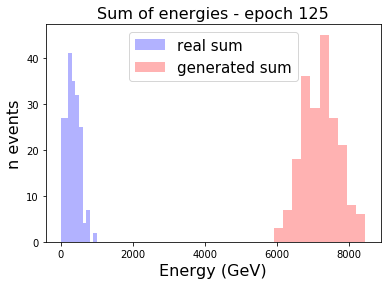

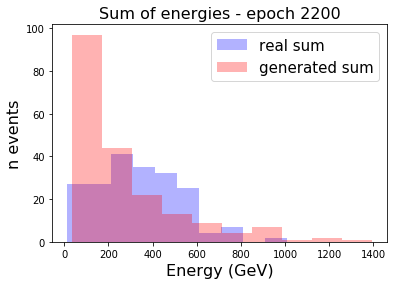

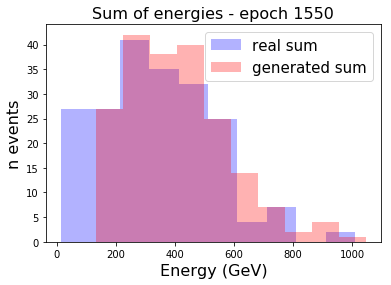

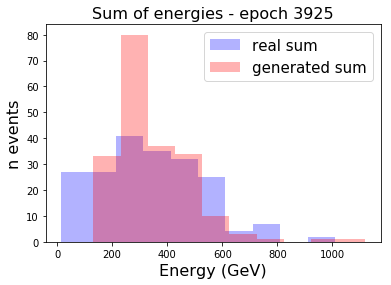

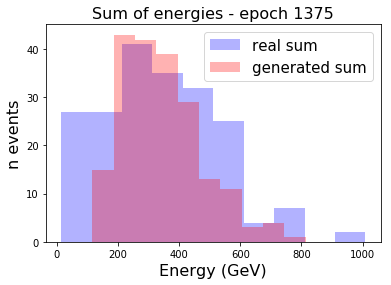

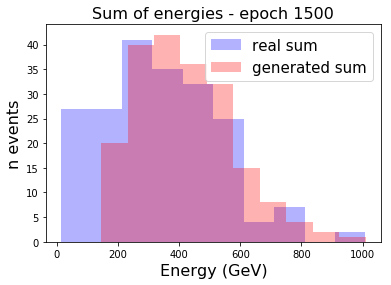

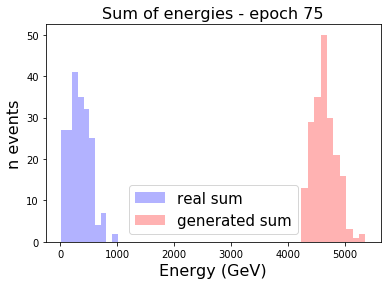

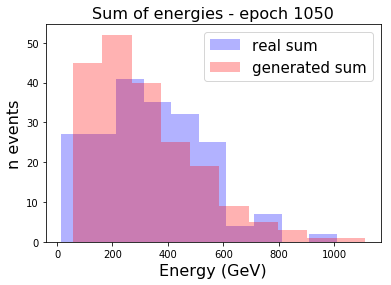

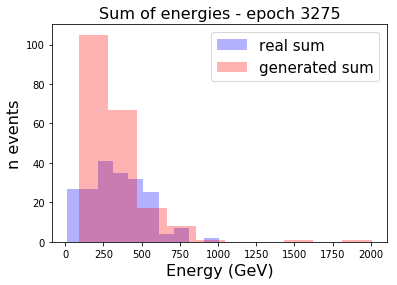

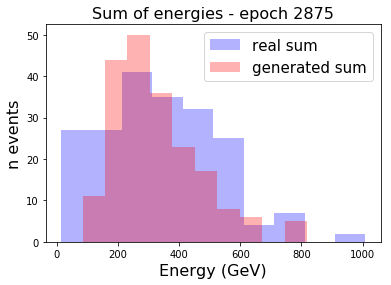

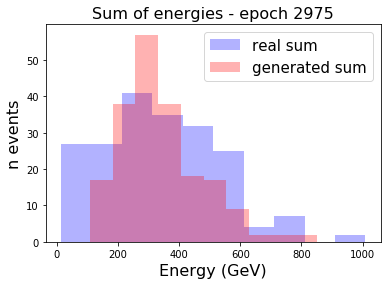

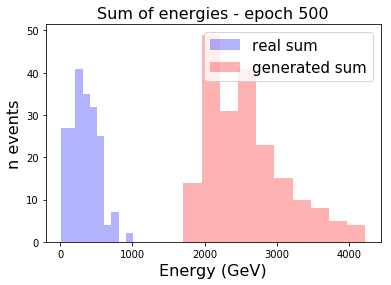

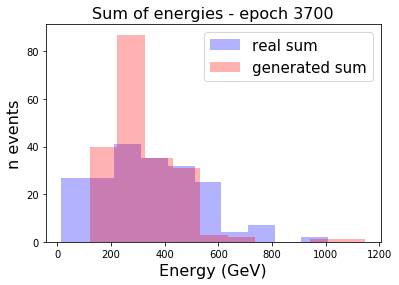

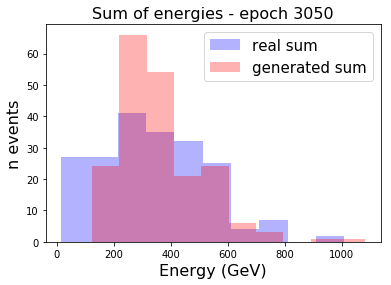

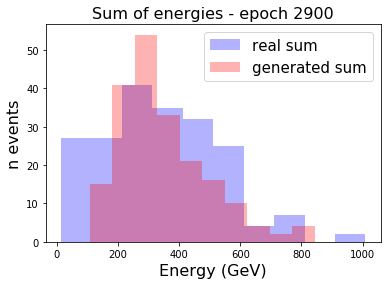

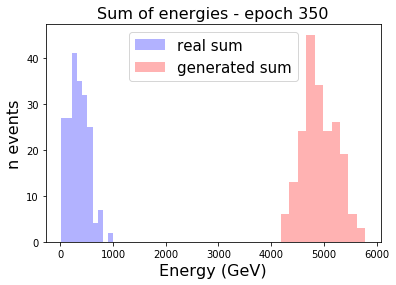

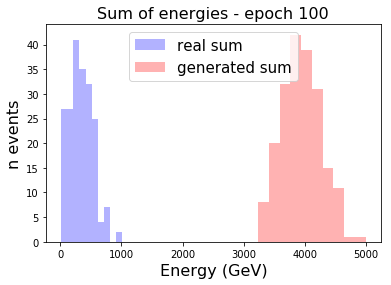

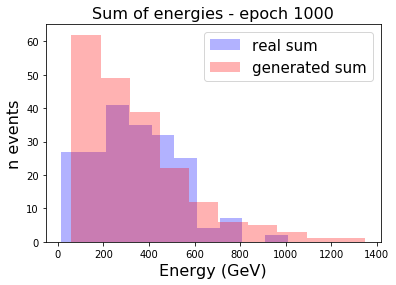

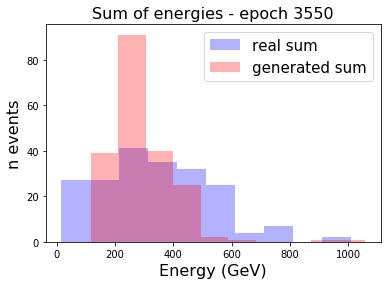

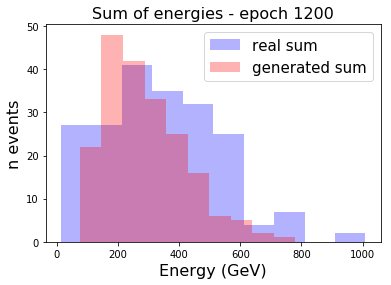

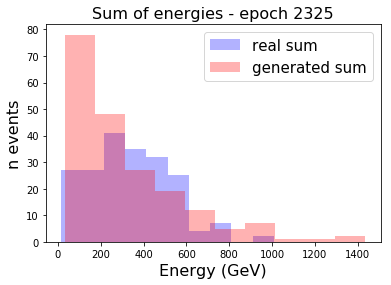

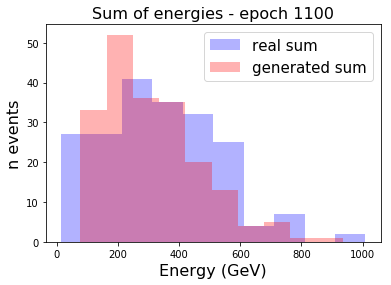

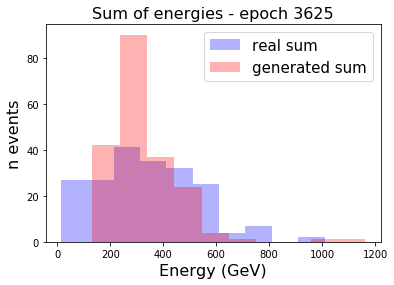

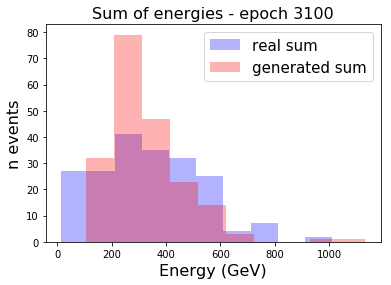

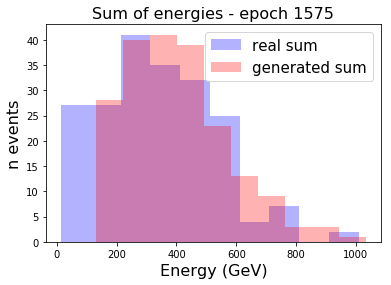

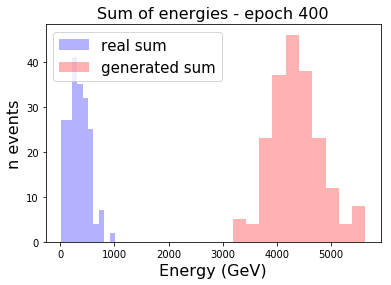

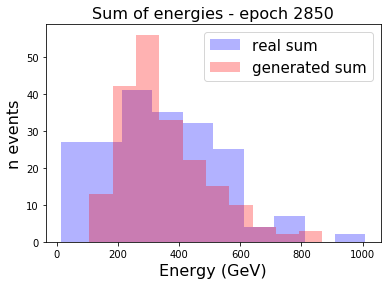

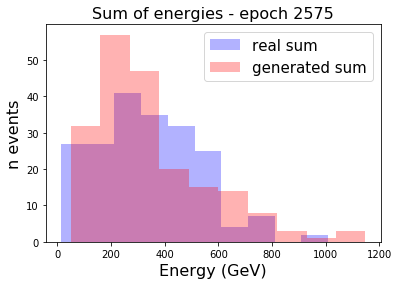

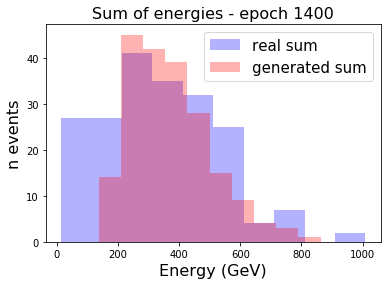

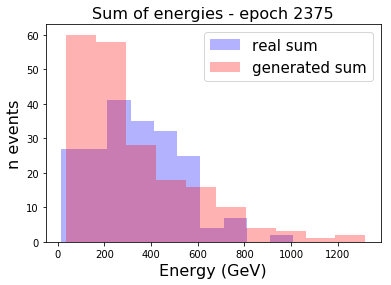

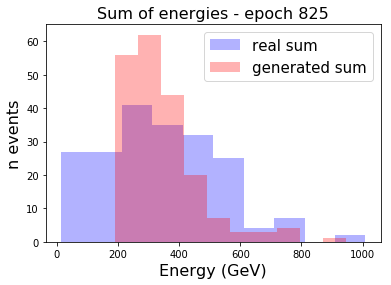

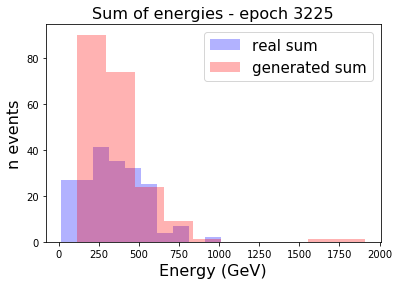

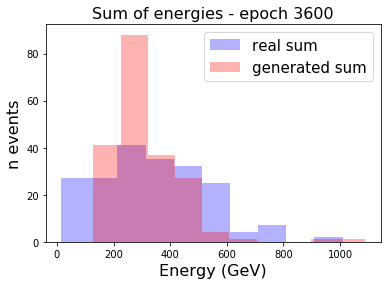

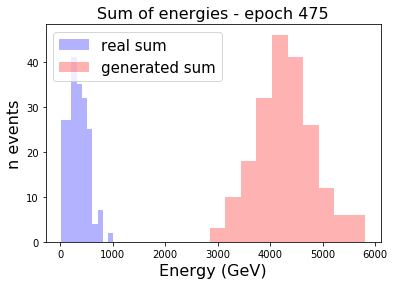

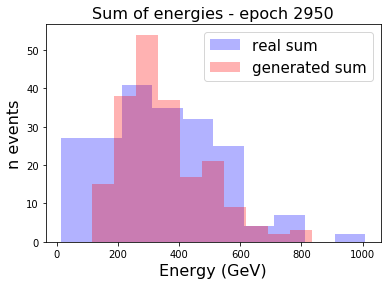

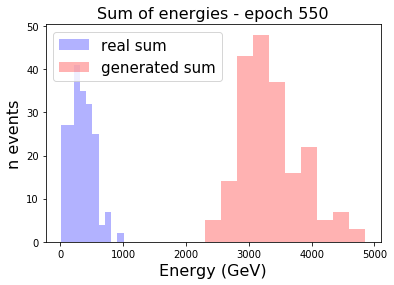

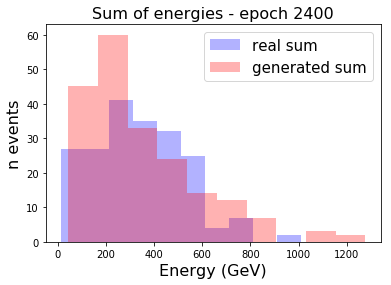

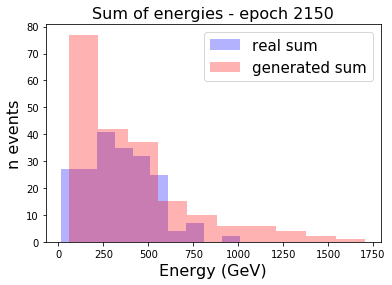

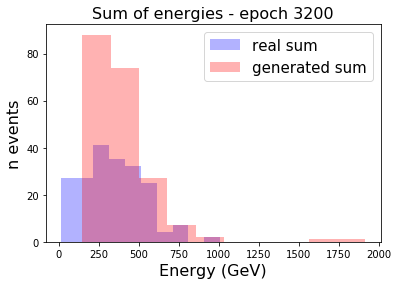

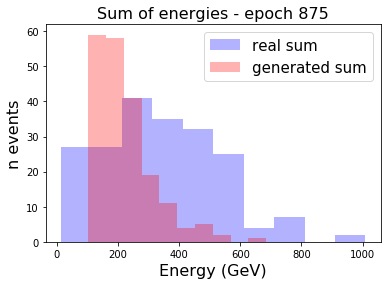

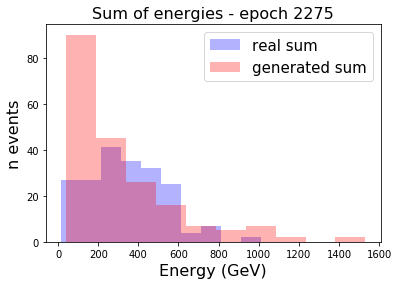

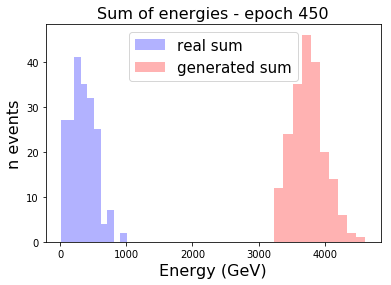

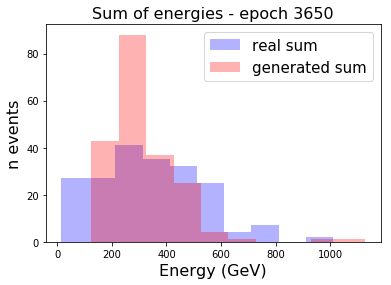

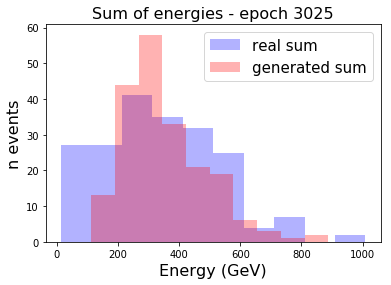

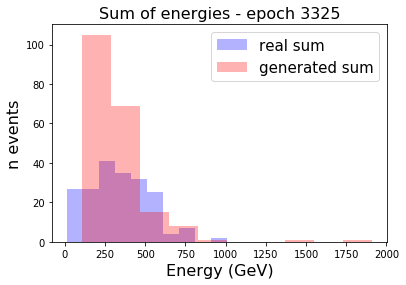

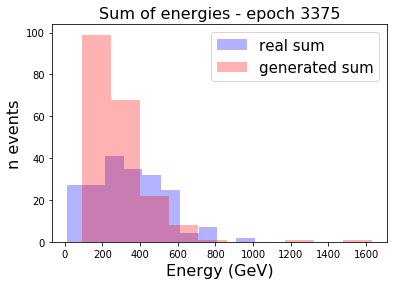

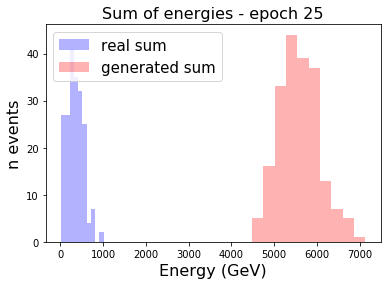

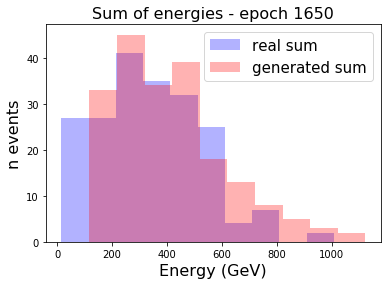

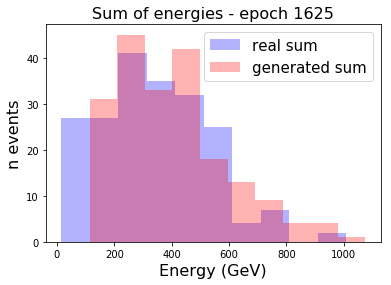

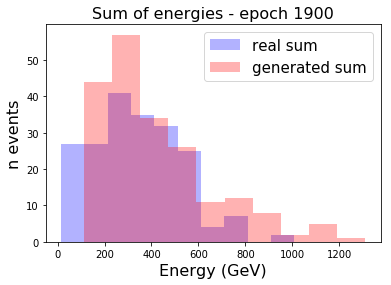

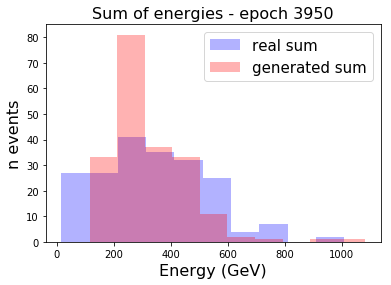

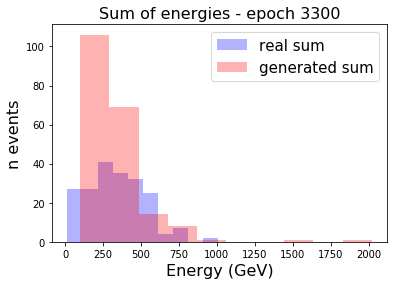

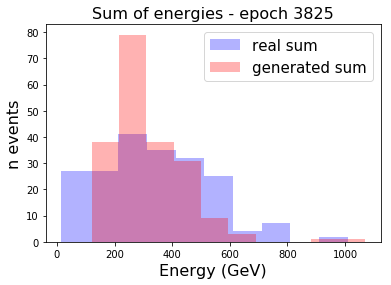

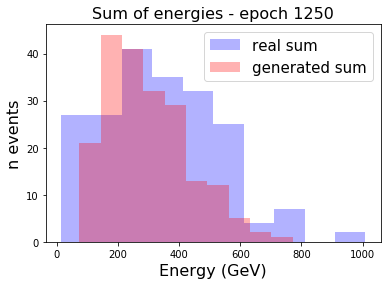

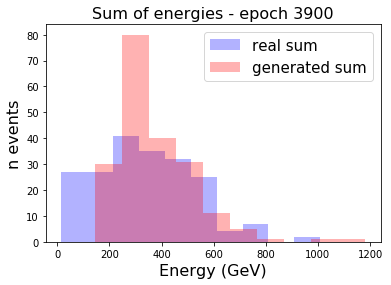

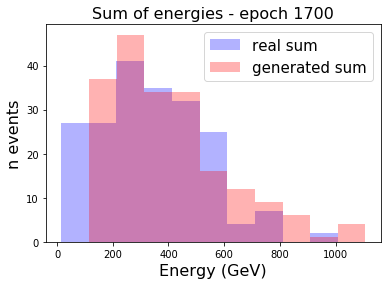

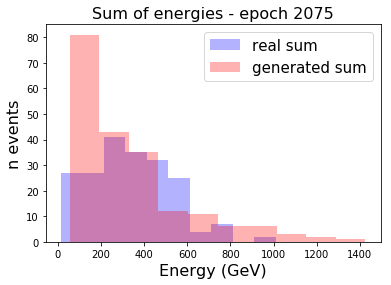

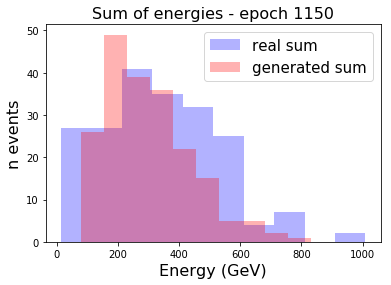

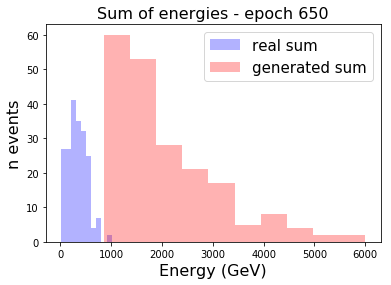

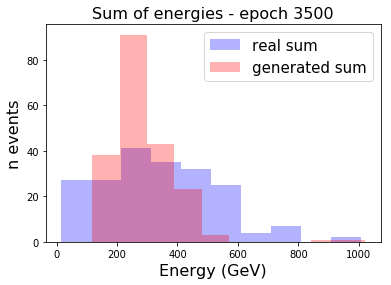

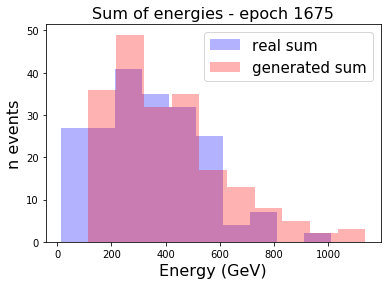

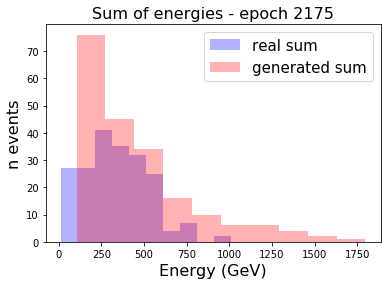

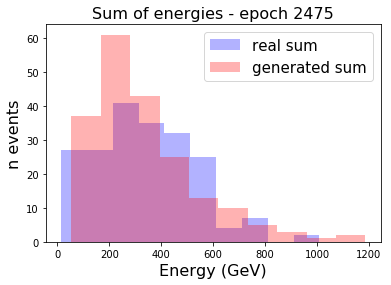

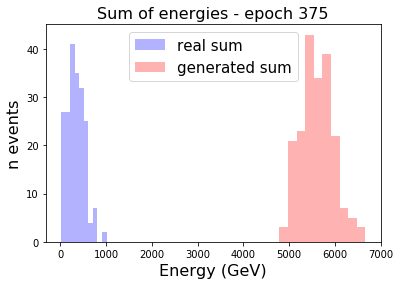

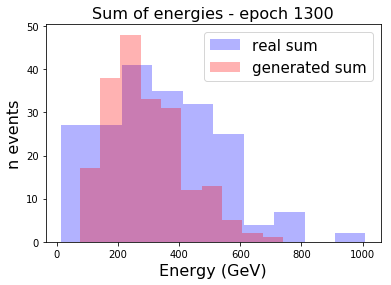

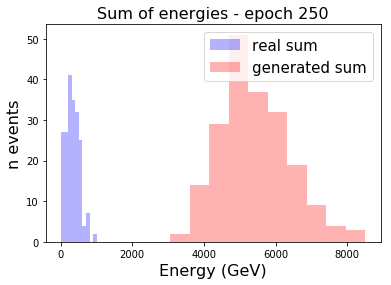

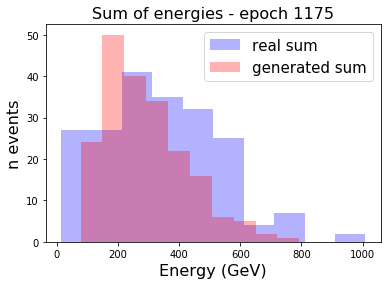

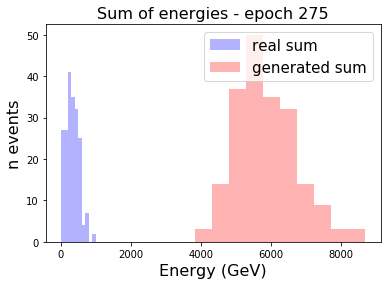

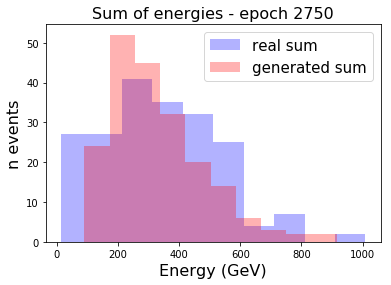

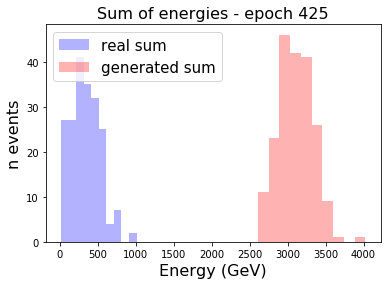

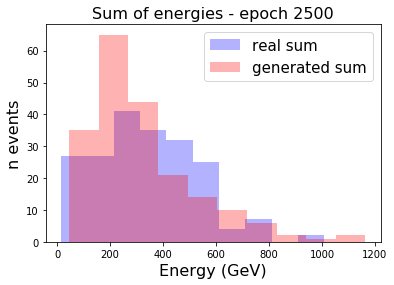

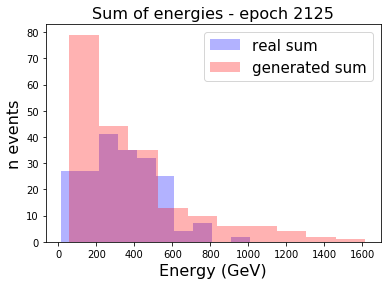

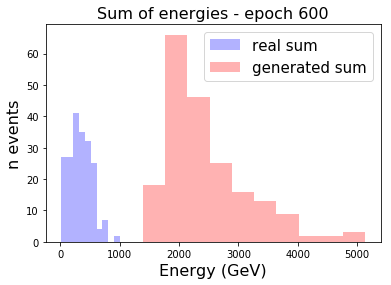

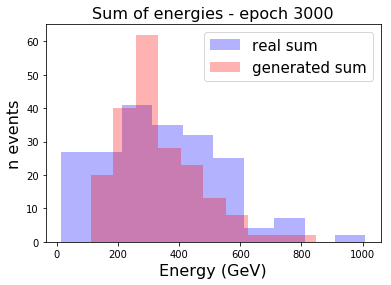

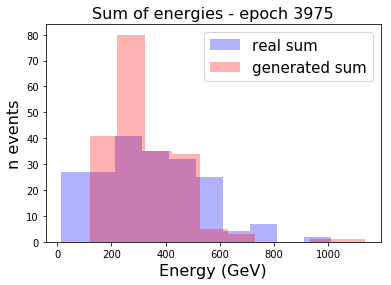

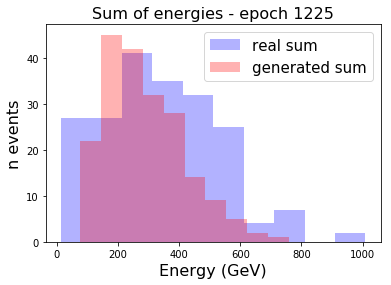

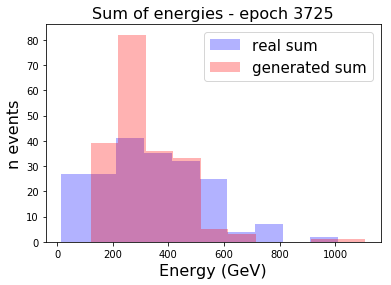

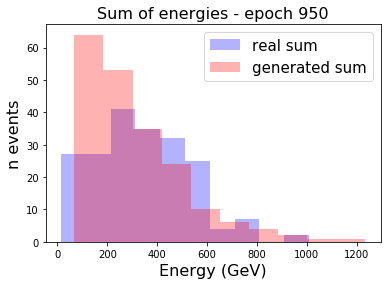

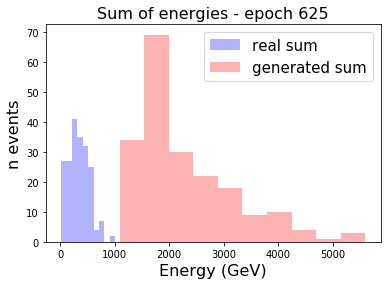

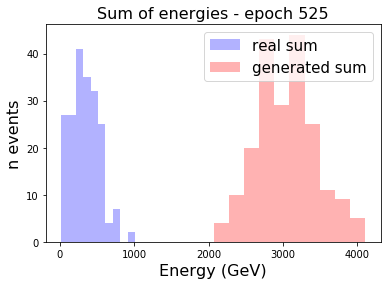

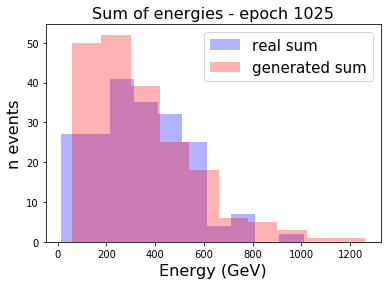

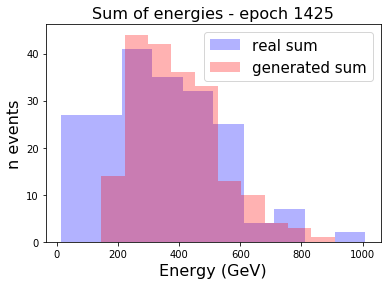

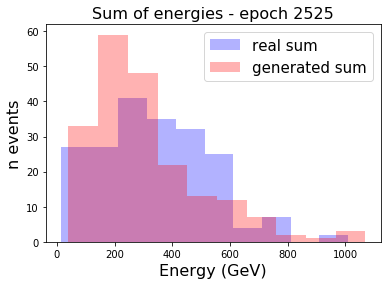

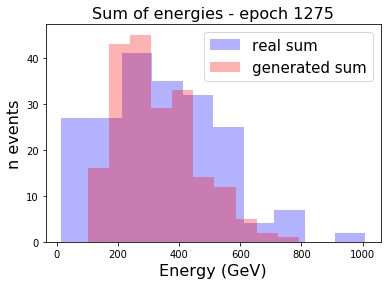

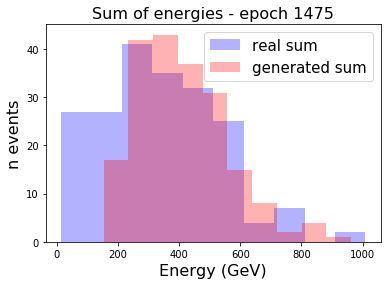

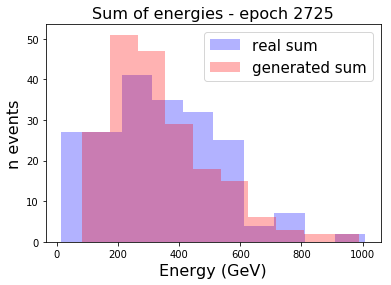

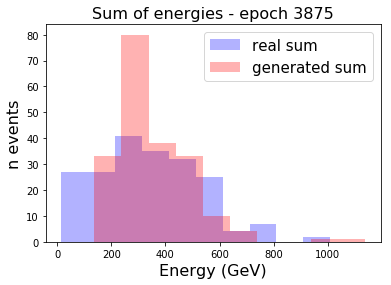

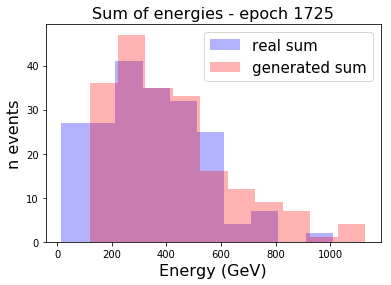

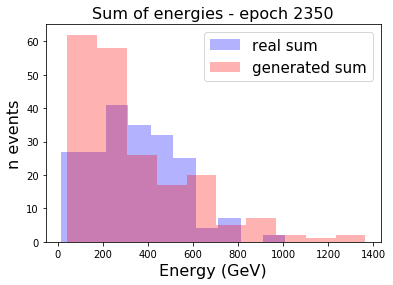

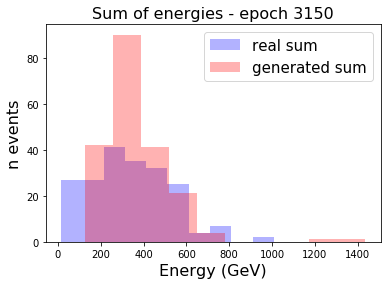

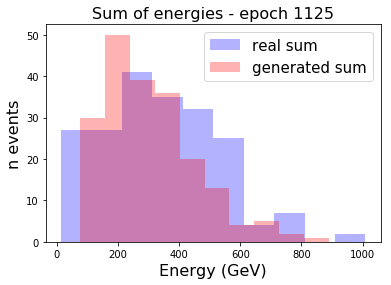

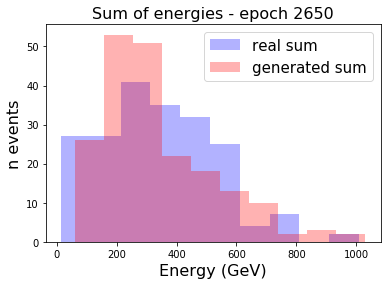

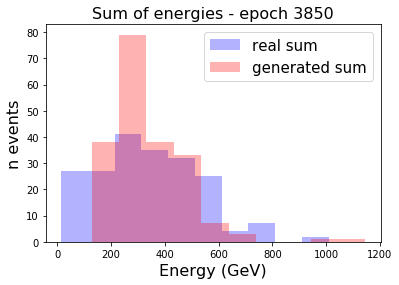

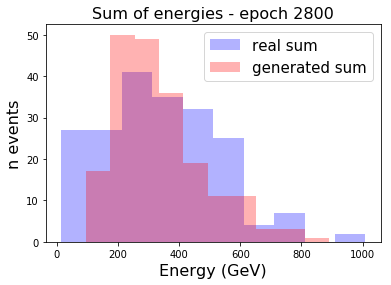

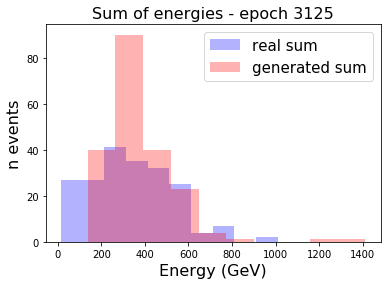

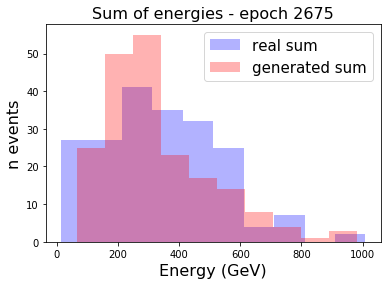

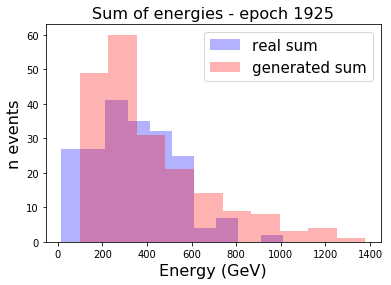

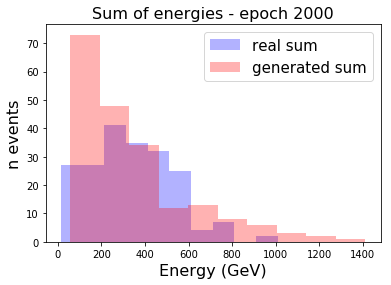

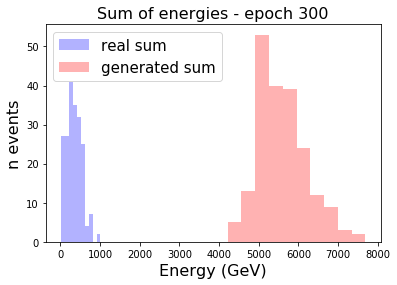

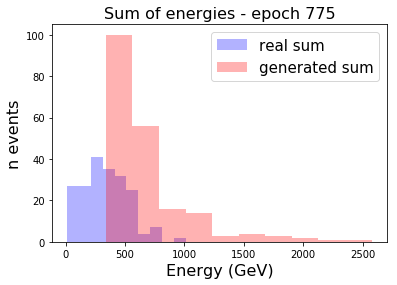

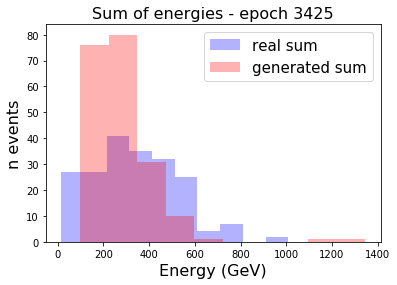

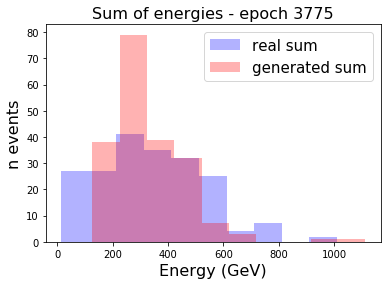

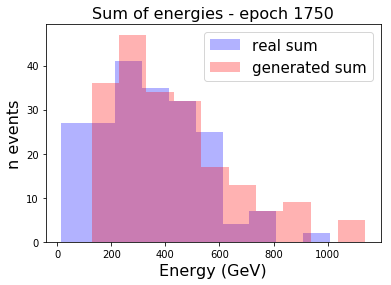

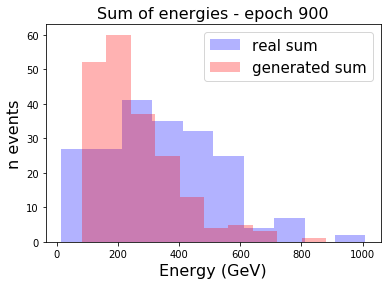

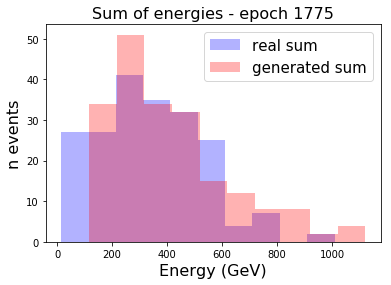

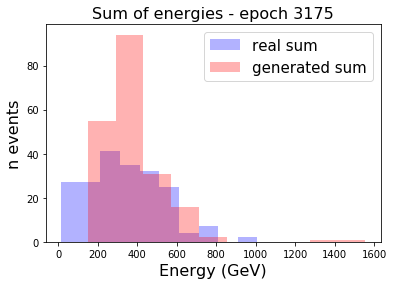

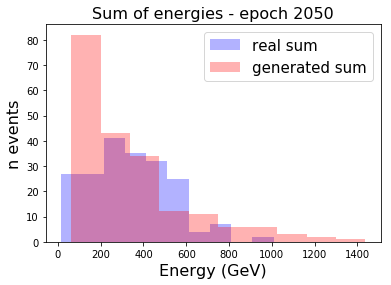

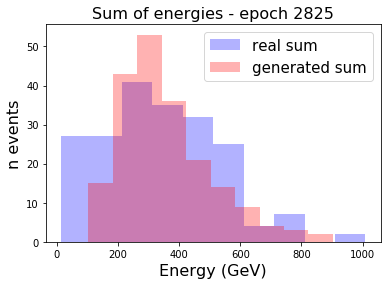

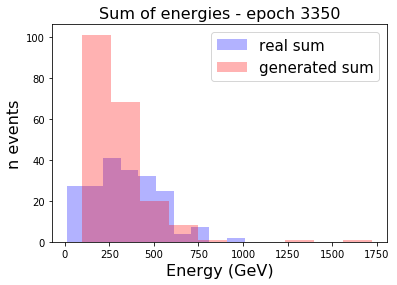

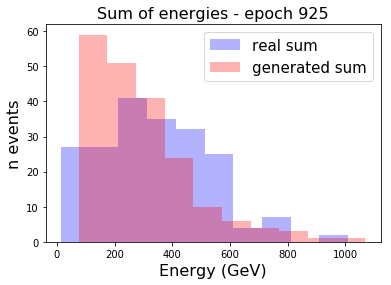

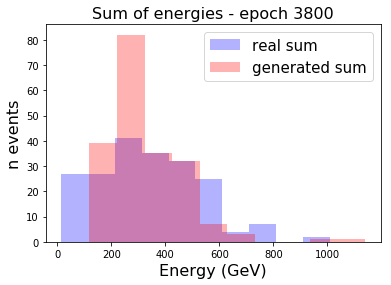

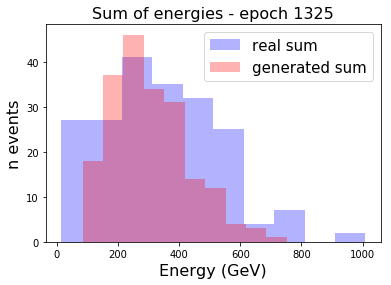

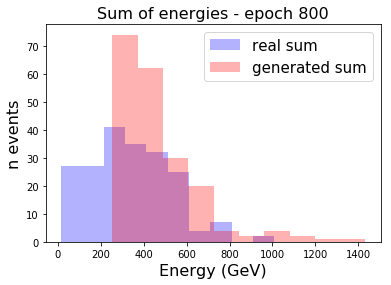

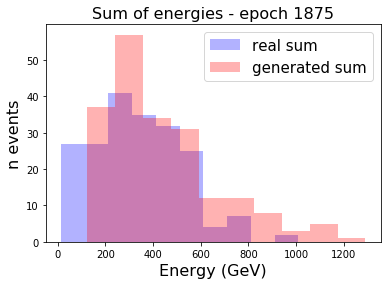

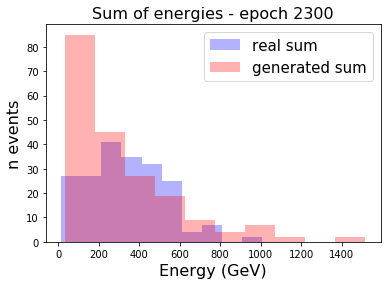

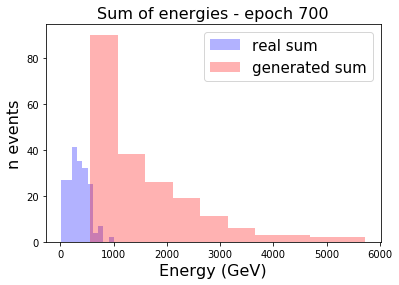

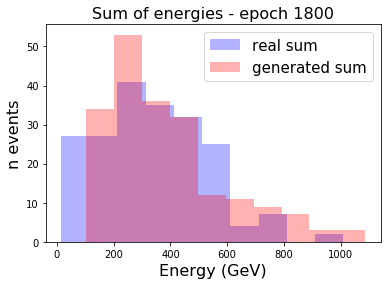

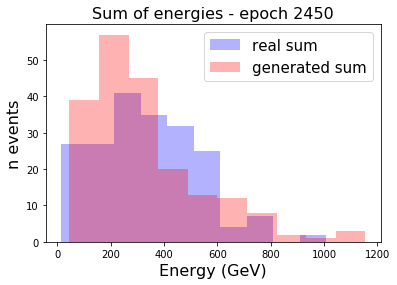

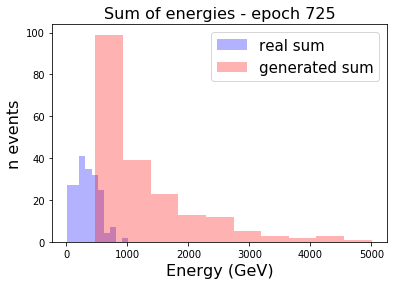

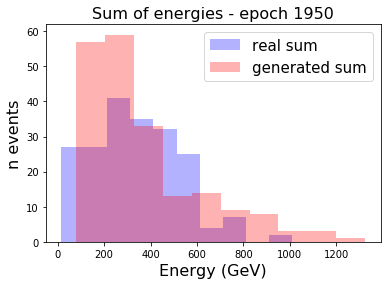

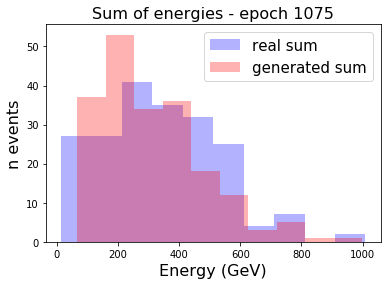

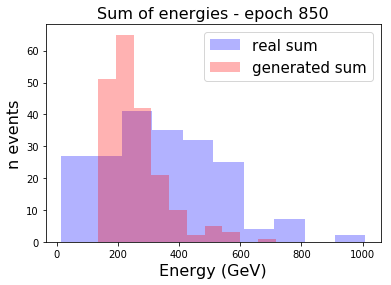

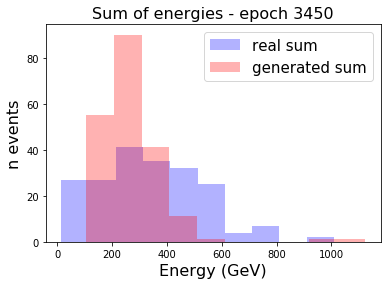

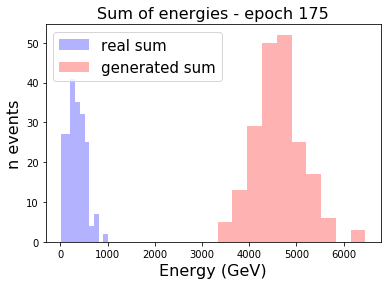

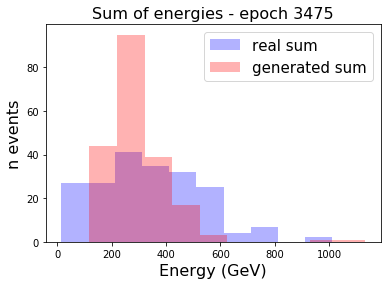

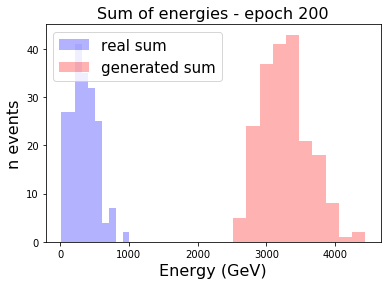

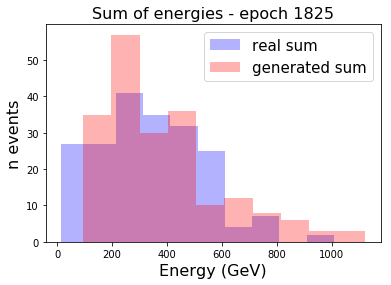

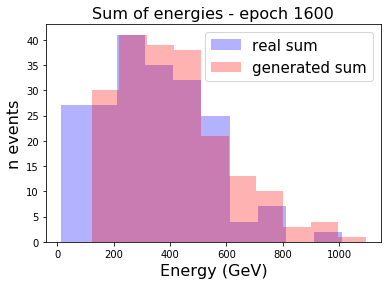

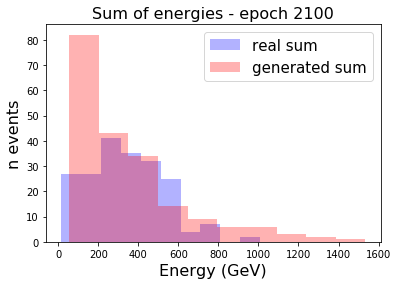

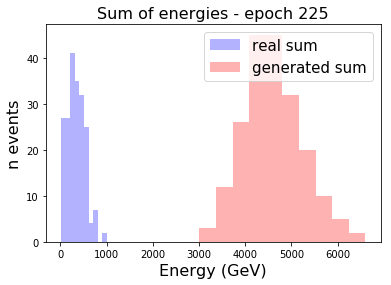

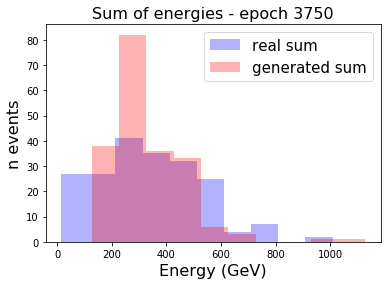

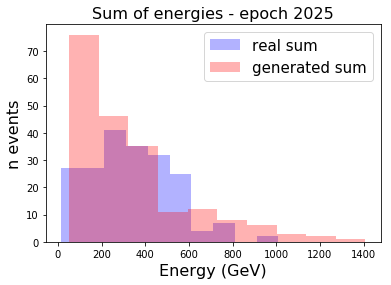

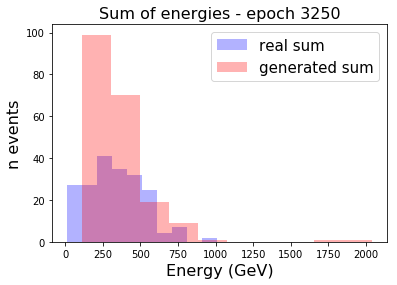

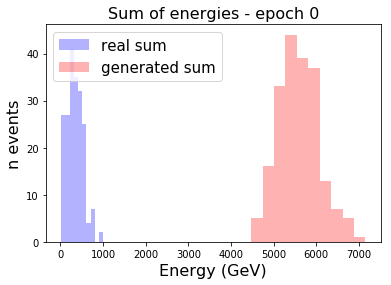

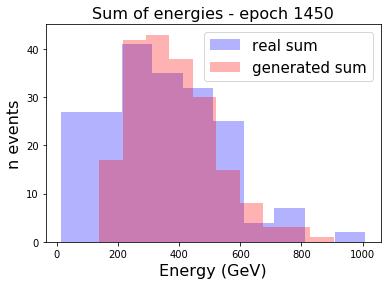

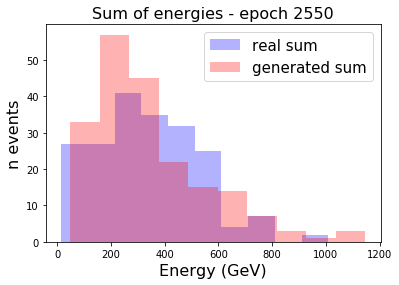

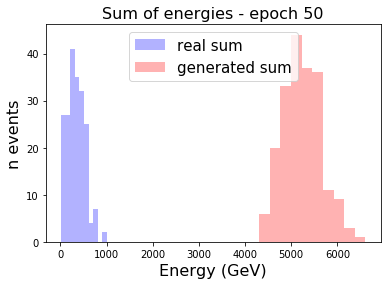

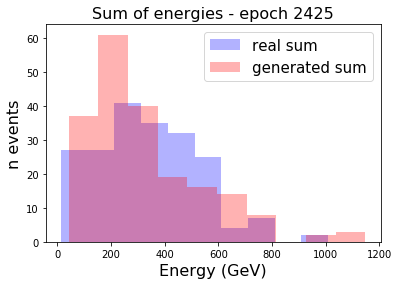

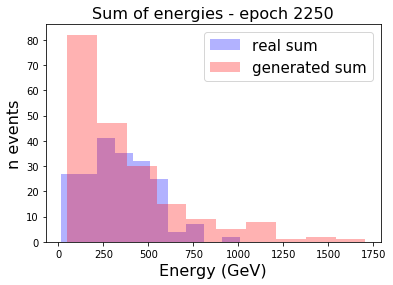

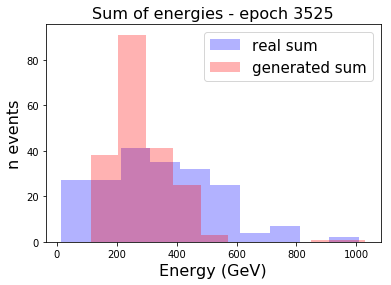

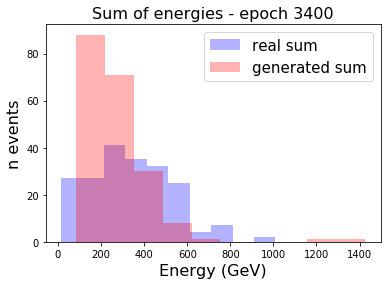

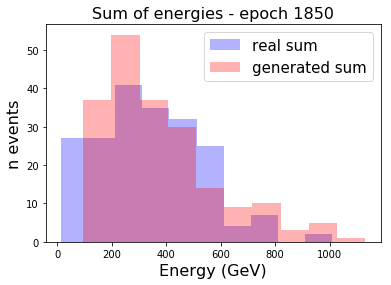

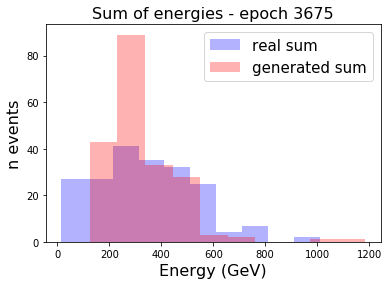

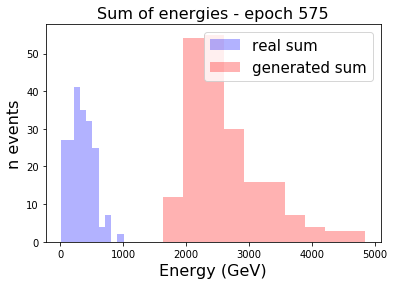

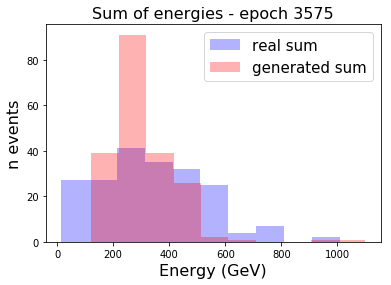

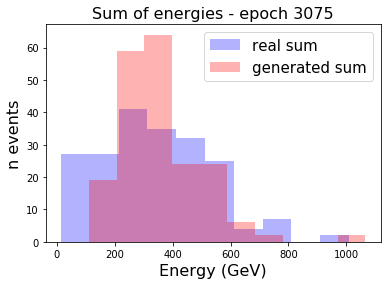

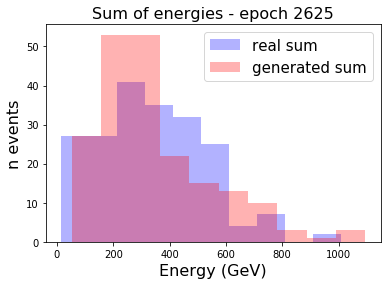

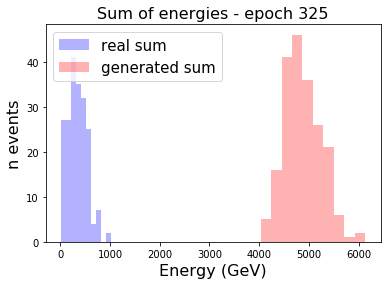

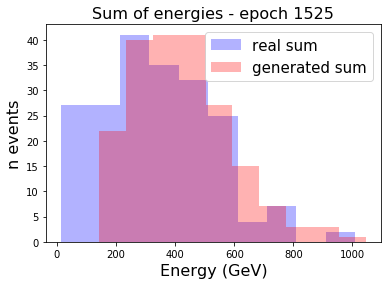

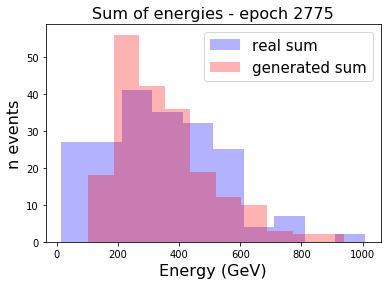

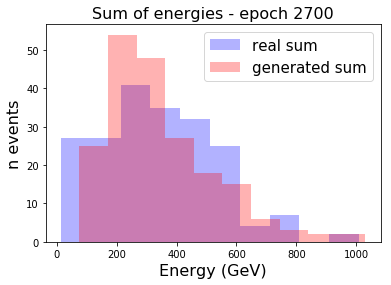

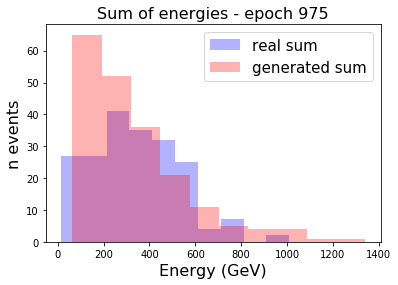

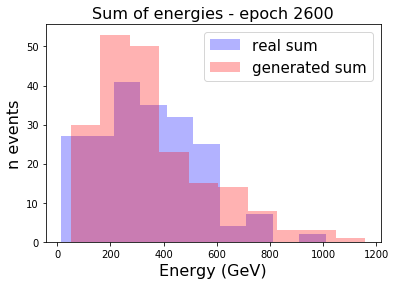

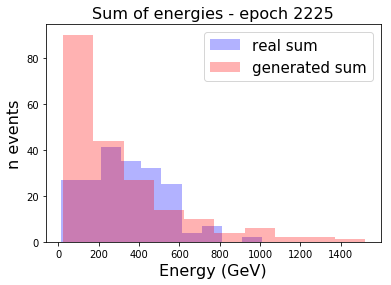

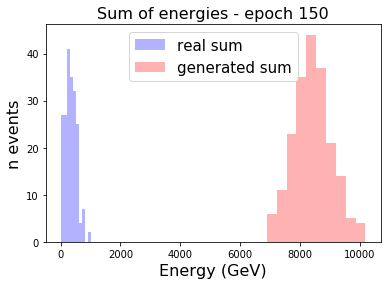

In [9]:
plotSumHist(inp_sum, all_g_weight1, gen_model1)

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


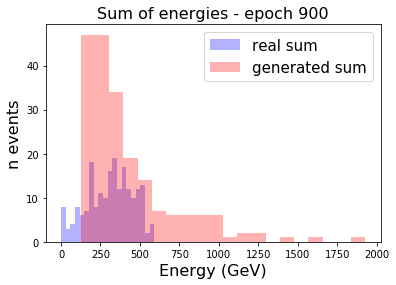

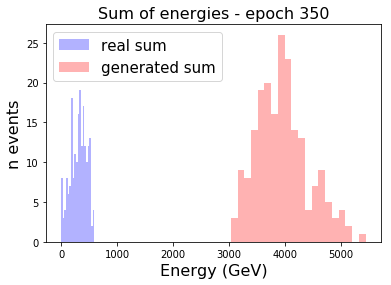

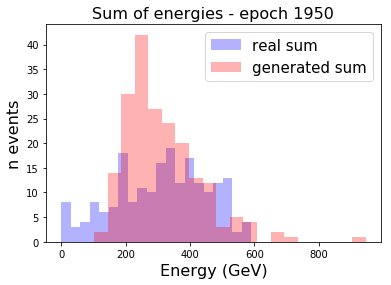

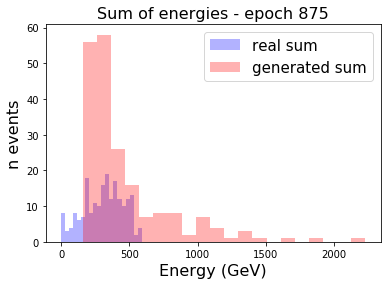

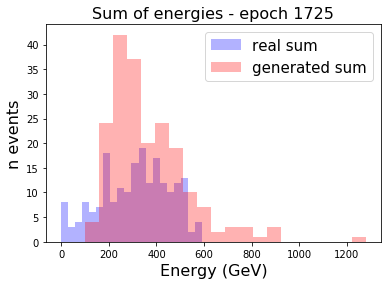

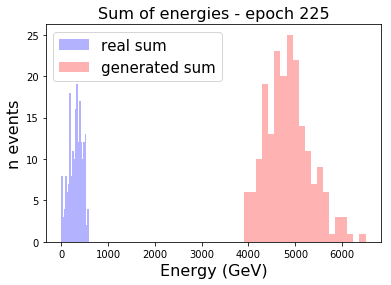

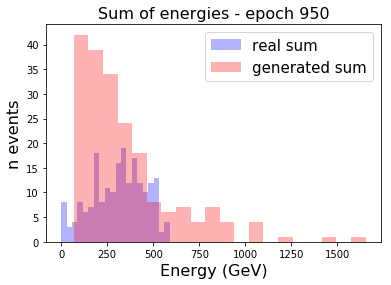

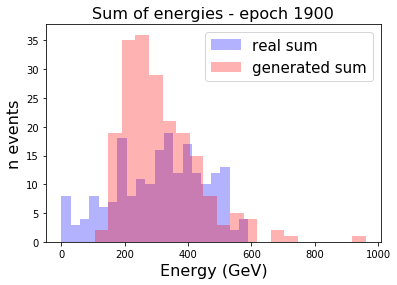

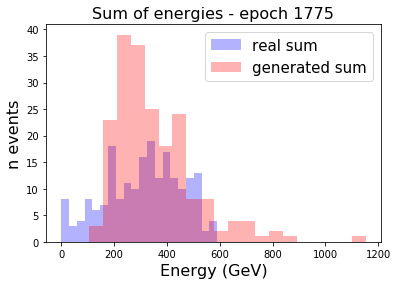

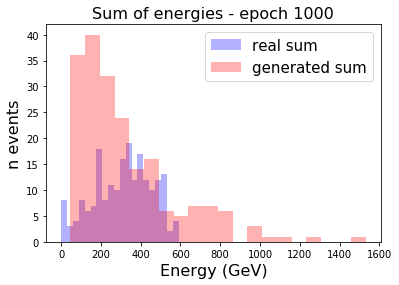

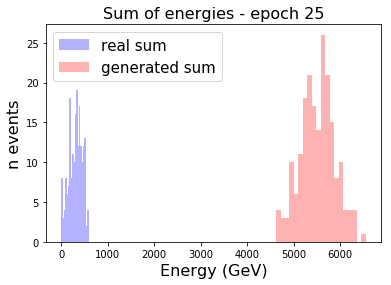

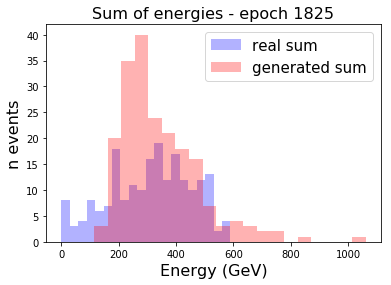

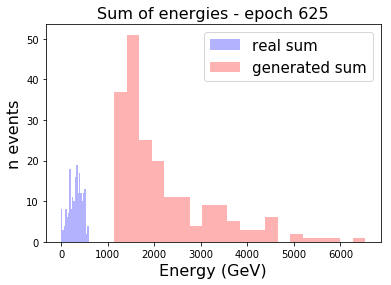

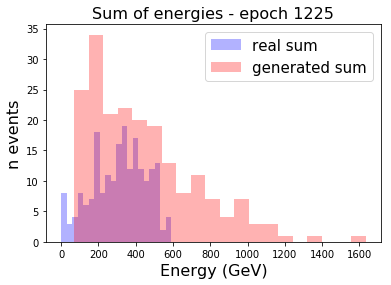

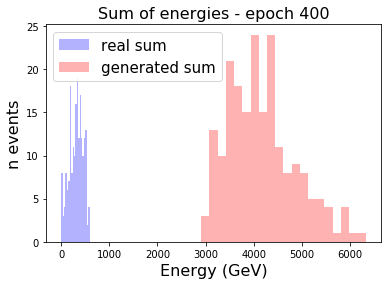

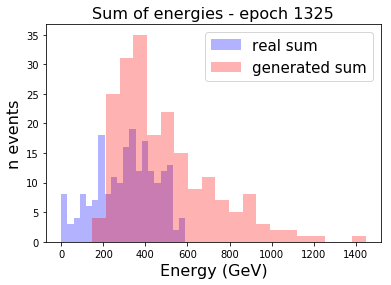

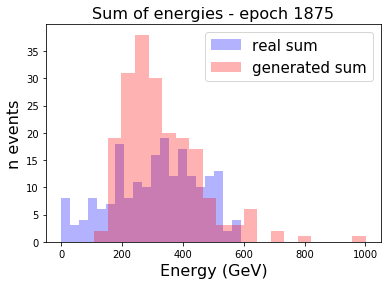

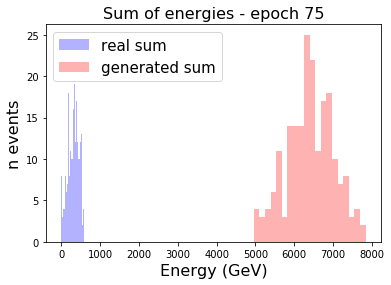

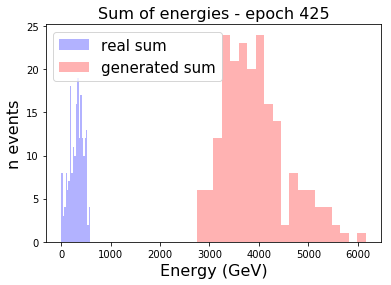

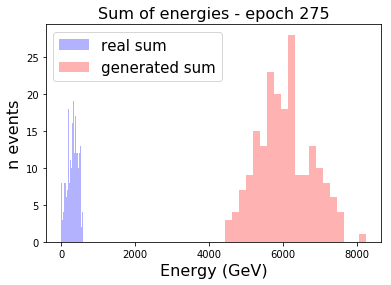

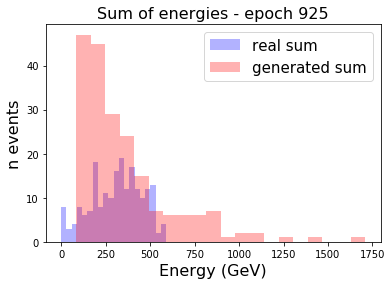

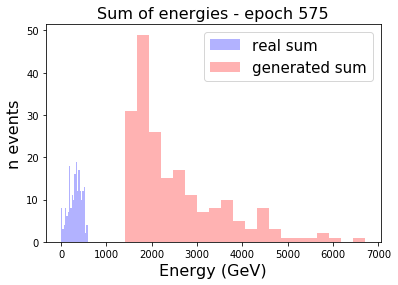

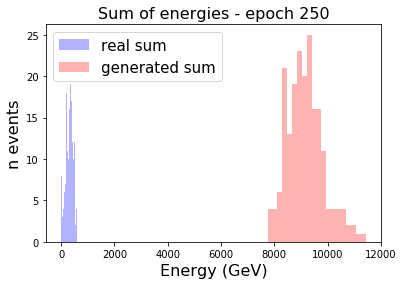

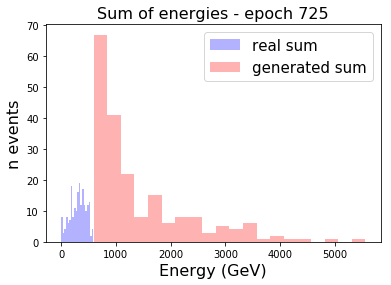

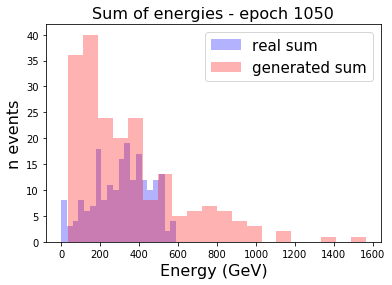

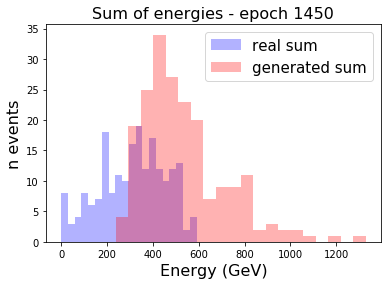

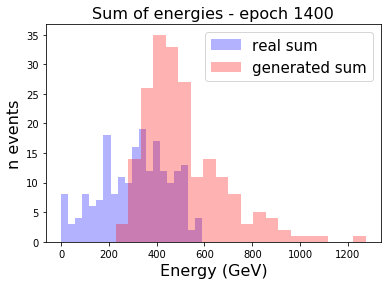

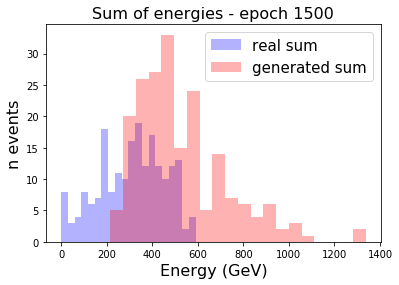

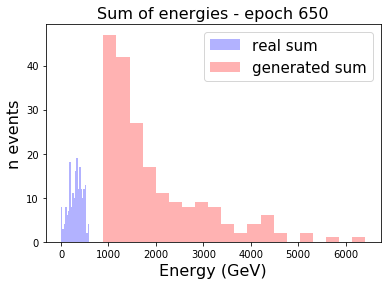

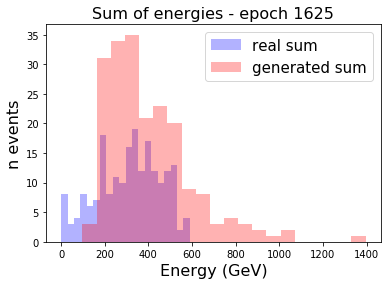

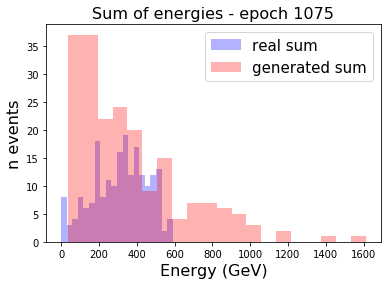

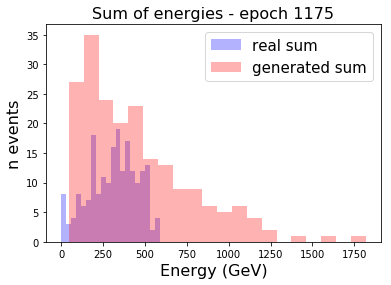

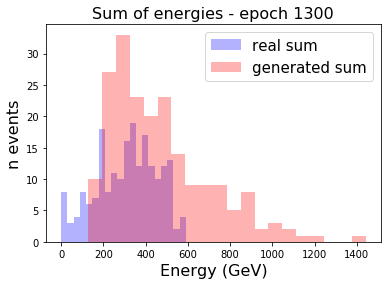

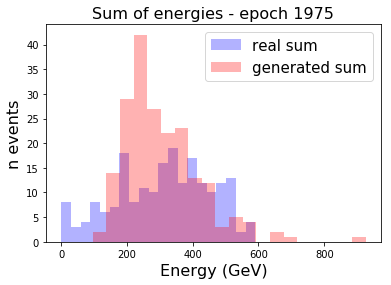

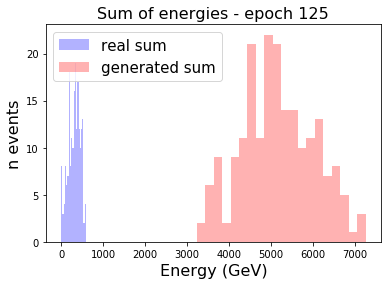

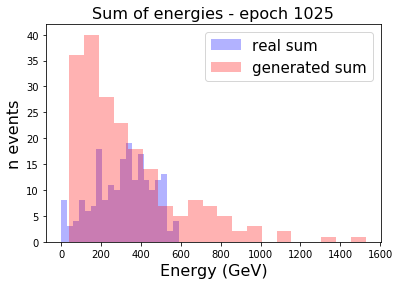

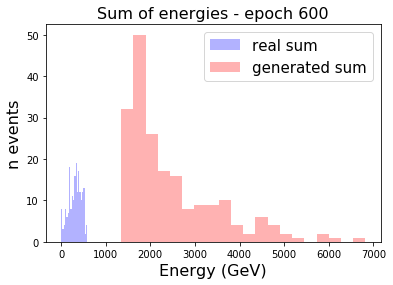

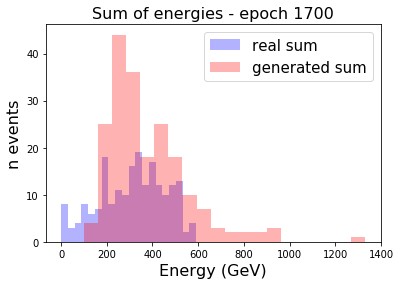

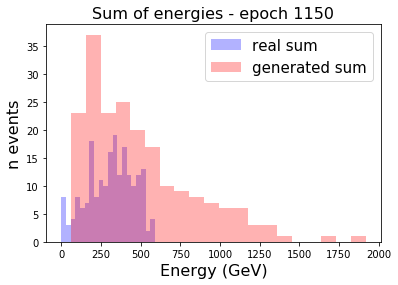

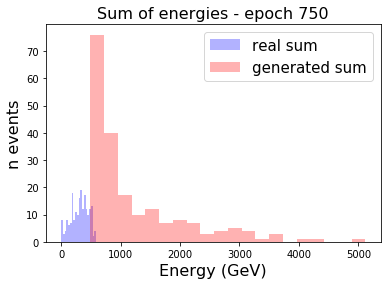

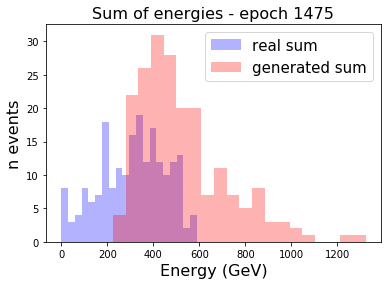

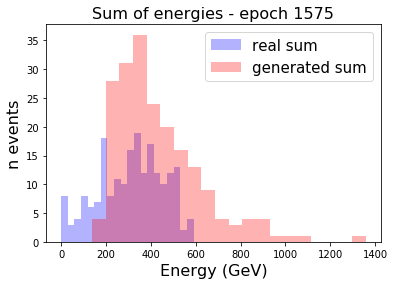

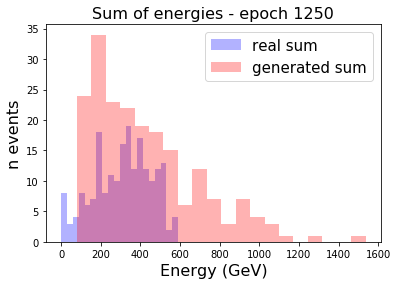

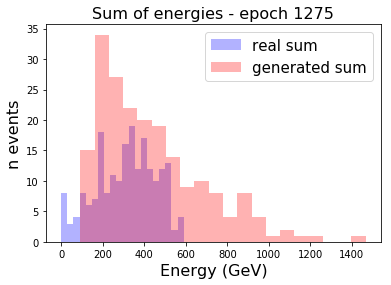

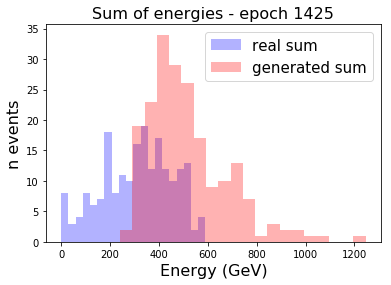

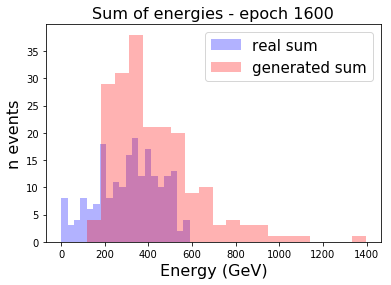

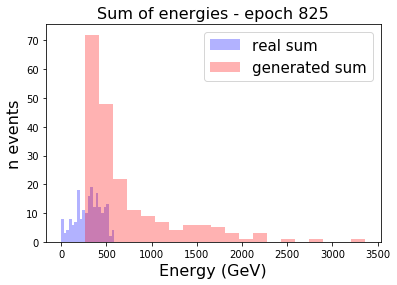

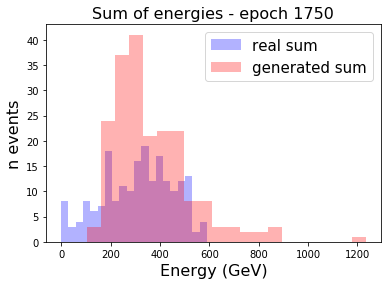

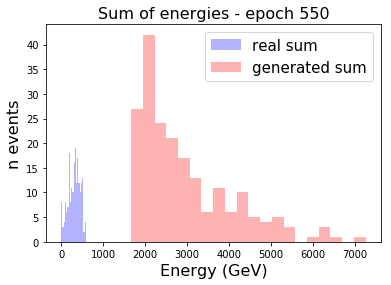

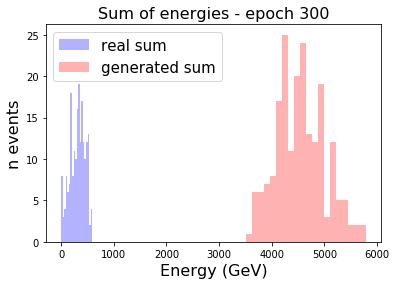

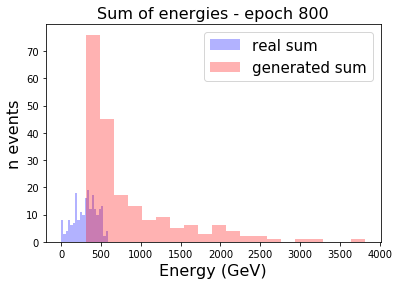

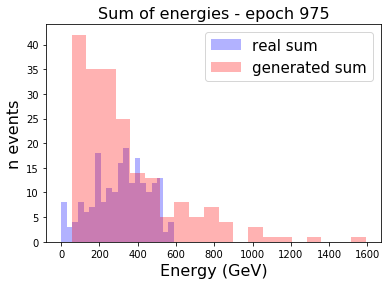

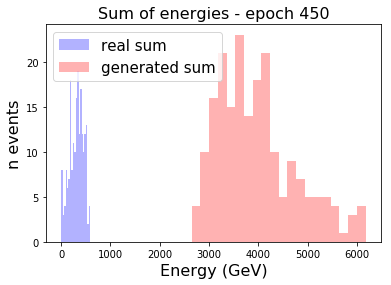

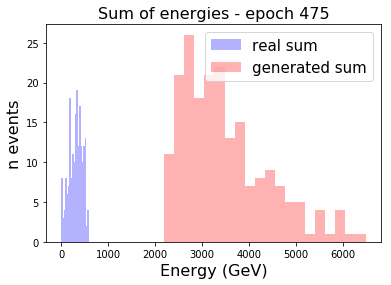

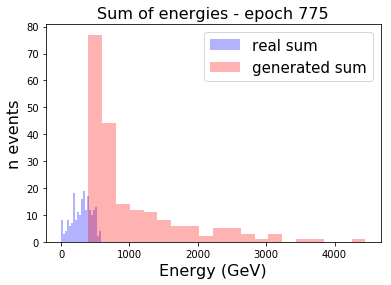

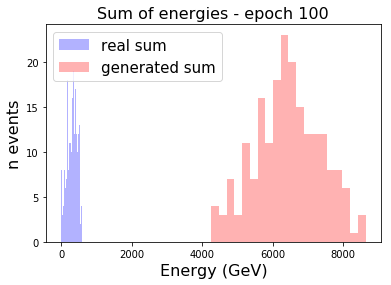

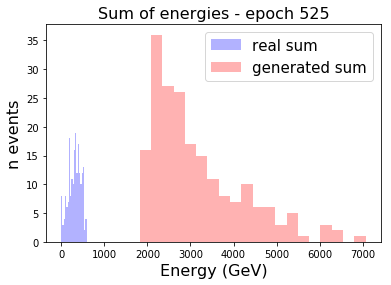

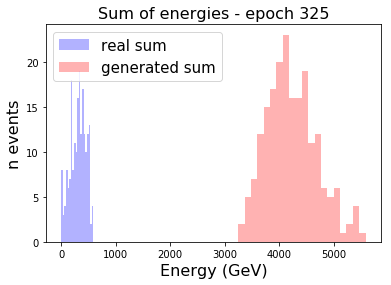

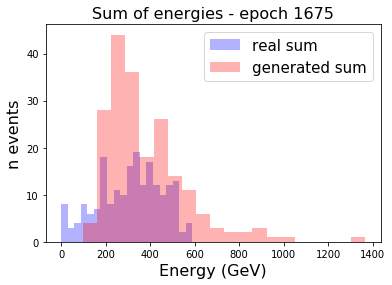

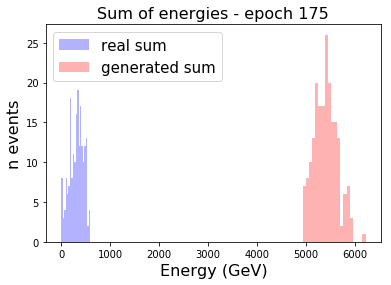

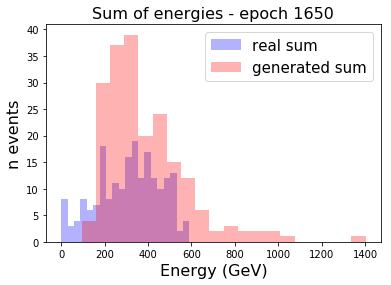

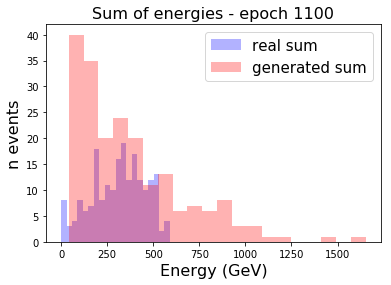

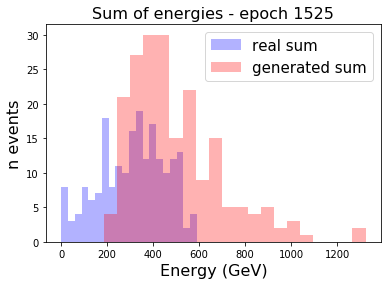

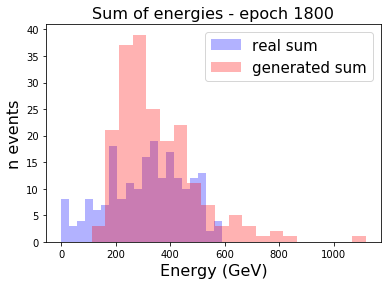

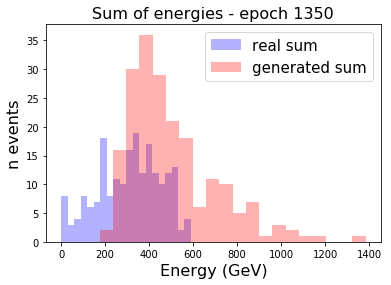

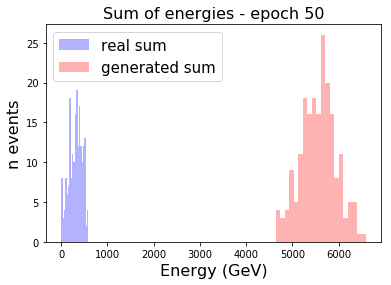

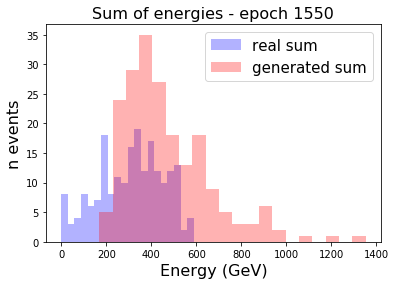

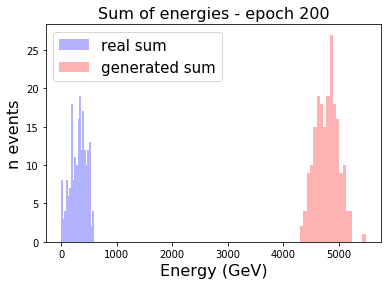

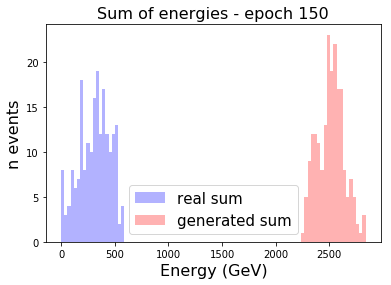

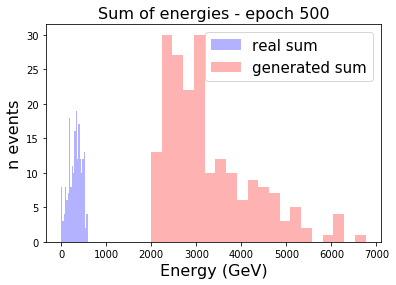

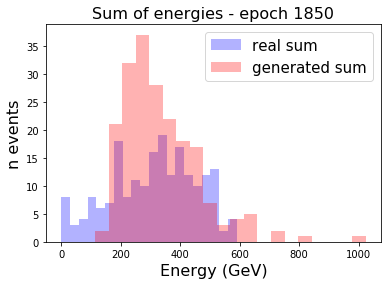

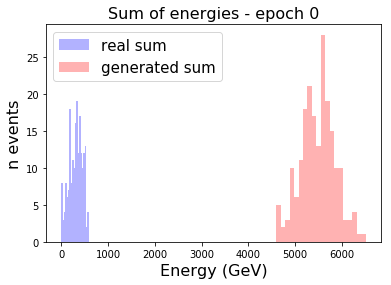

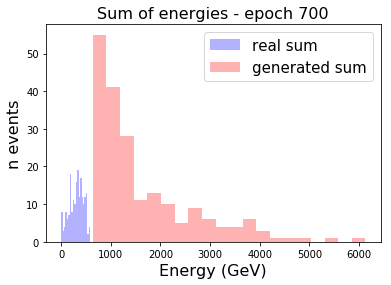

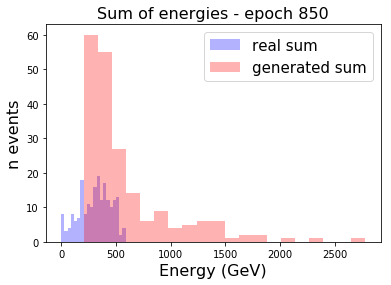

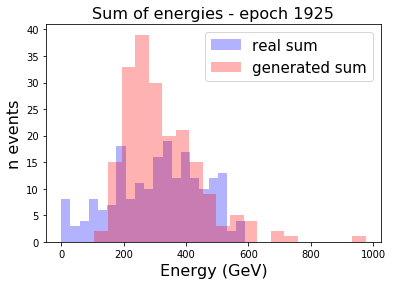

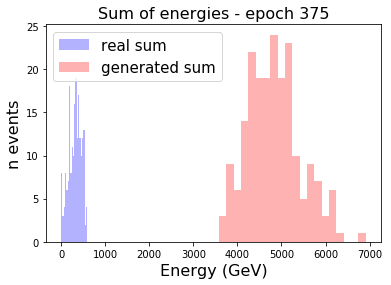

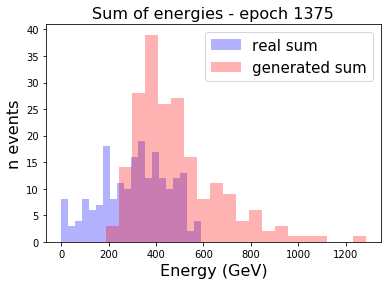

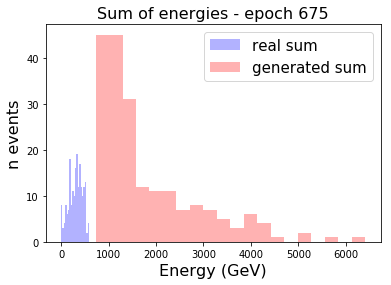

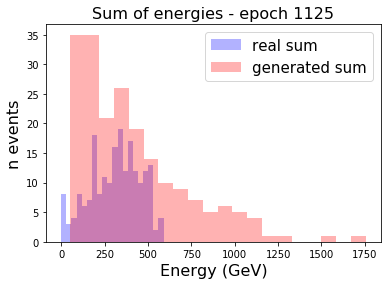

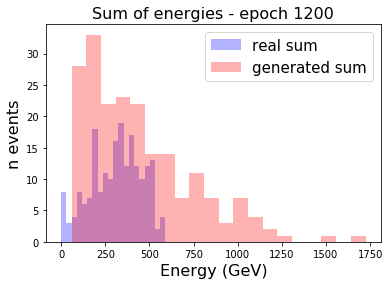

In [5]:
plotSumHist(inp_sum, all_g_weight2, gen_model2)